# Seminar 5: Counting Processes

In [1]:
import numpy as np
import scipy.stats as stats

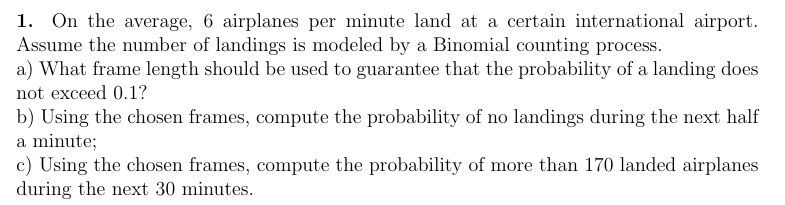

### a)

$$ \lambda = 6 \backslash min$$ $$ p = 0.1$$
$$ \Delta \le \frac{p}{\lambda} = \frac{0.1}{6} min = \frac{0.1 \cdot 60}{6} sec = \frac{6}{6} sec = 1 sec$$

### b)

In [21]:
t = 30 # seconds
delta = 1 # seconds
n = t / delta # number of frames in time t
p = 0.1
successes_wanted = 0
stats.binom.pmf(successes_wanted, n, p) # probability of 0 successes in n trials, with p probability of success

0.042391158275216195

### c)

In [28]:
t = 30 * 60 # seconds
delta = 1
successes_wanted = 170
n = t / delta
1 - stats.binom.cdf(successes_wanted, n, p) # probability of max 170 successes in n trials, with p probability of success

0.770883922462256

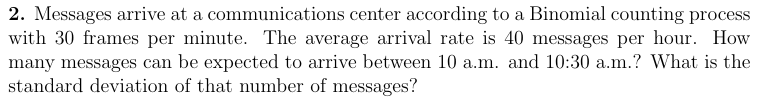

$$ \lambda = 40 \backslash hour = 40 \backslash 60min$$
$$ \Delta = \frac{1}{30}min$$
$$ p = \Delta \cdot \lambda = \frac{1}{45}$$

In [56]:
t = 30         # minutes
l = 40 / 60    # minutes
delta = 1 / 30 # minutes

p = l * delta # probability to happen in a frame
n = t / delta # number of frames

mean, var = stats.binom.stats(n, p)
# std = stats.binom.std(n, p)
print(mean, sqrt(var))

20.0 4.422166387140533


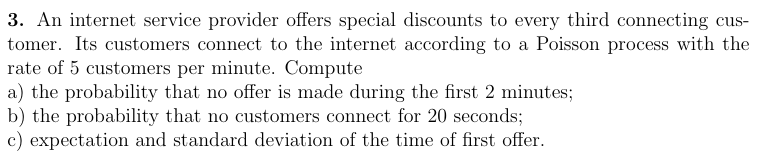

### a)

$$ P(\text{no offer}) = P(X \lt 3) = P (X \le 2), X - \text{Poisson Distribution, number of connections}$$

In [58]:
l = 5 / 1 # per minute
t = 2 # minutes
lambda_t = l * t

stats.poisson.cdf(2, lambda_t)

0.0027693957155115775

### b)

In [79]:
t = 20 / 60 # minutes
lambda_t = l * t
stats.poisson.pmf(0, lambda_t)

0.18887560283756183

### c)

In [94]:
# offer = 3 connections = 3 Exp(5) RV's, scale = 1/lambda for Gamma
mean, var = stats.gamma.stats(a=3, scale=1/5)
print(mean, sqrt(var))

0.6000000000000001 0.3464101615137755


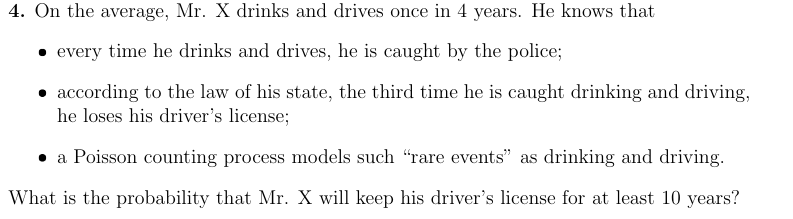

In [100]:
l = 1 / 4 # years - once every 4 years - drink and drive
t = 10    # years - time we're interested in
lambda_t = l * t

stats.poisson.cdf(2, lambda_t) # maximum 2 'drink and drives' happening in 10 years, with l arrival rate

0.5438131158833297

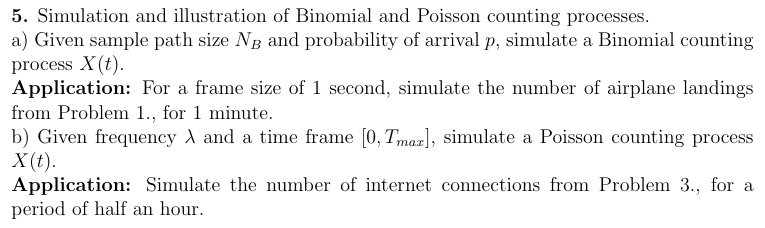

### a)

In [118]:
def binomial_counting_process_simulation(N, p):
    successes = 0
    
    for _ in range(N):
        U = np.random.rand()
        successes += (U < p)
    
    return successes

### Binomial application

In [119]:
p = 0.1
N = 60 # t / delta = 60 seconds / 1 seconds
print(binomial_counting_process_simulation(N, p))

5


### b)

In [146]:
def poisson_counting_process_simulation(T_max, l):
    U = np.random.rand()
    last = -1 / l * np.log(U)
    T = [last]
    
    while last <= T_max:
        U = np.random.rand()
        last -=  (1 / l * np.log(U))
        T.append(last)
    
    return len(T) # occurrances before reaching T_max

In [145]:
T_max = 30
l = 5

arrivals = poisson_counting_process_simulation(T_max, l)
print(f"arrivals = {arrivals}")

arrivals = 158
